# LSTM ile Metin Sınıflandırma

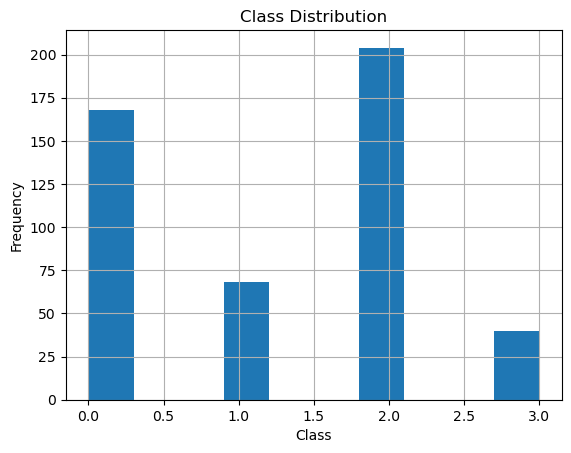

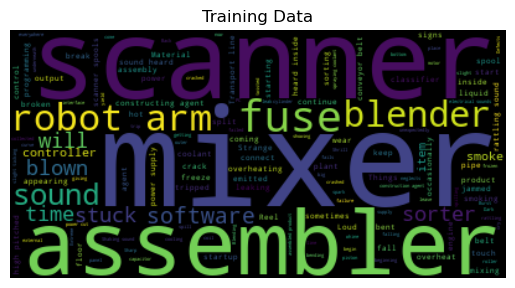

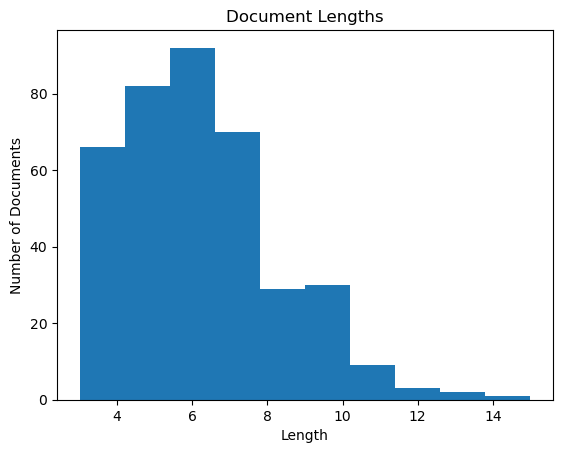

Epoch 1/10
12/12 [==============================] - 4s 87ms/step - loss: 1.3492 - accuracy: 0.4010 - val_loss: 1.2885 - val_accuracy: 0.4271
Epoch 2/10
12/12 [==============================] - 0s 19ms/step - loss: 1.2422 - accuracy: 0.4245 - val_loss: 1.1653 - val_accuracy: 0.4271
Epoch 3/10
12/12 [==============================] - 0s 22ms/step - loss: 1.1153 - accuracy: 0.4271 - val_loss: 1.0219 - val_accuracy: 0.4896
Epoch 4/10
12/12 [==============================] - 0s 21ms/step - loss: 0.8433 - accuracy: 0.5781 - val_loss: 0.6885 - val_accuracy: 0.7604
Epoch 5/10
12/12 [==============================] - 0s 24ms/step - loss: 0.4773 - accuracy: 0.8177 - val_loss: 0.5346 - val_accuracy: 0.8021
Epoch 6/10
12/12 [==============================] - 0s 18ms/step - loss: 0.2798 - accuracy: 0.9010 - val_loss: 0.6046 - val_accuracy: 0.8125
Epoch 7/10
12/12 [==============================] - 0s 16ms/step - loss: 0.2360 - accuracy: 0.8984 - val_loss: 0.5688 - val_accuracy: 0.8229
Epoch 8/10
12

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Softmax
from tensorflow.keras.utils import to_categorical
from wordcloud import WordCloud

# Veriyi oku
filename = "factoryReports.csv"
data = pd.read_csv(filename)

# Kategorik sütunu kategorik veri tipine çevir
data['Category'] = pd.Categorical(data['Category'])
data['Category'] = data['Category'].cat.codes

# Sınıf dağılımını gösteren histogram
data['Category'].hist()
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

# Veriyi train ve validation olarak böl
dataTrain, dataValidation = train_test_split(data, test_size=0.2, stratify=data['Category'])

textDataTrain = dataTrain['Description']
textDataValidation = dataValidation['Description']

# Eğitim verisi için WordCloud
wordcloud = WordCloud().generate(' '.join(textDataTrain))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Training Data")
plt.axis('off')
plt.show()

# Metin verisini ön işleme
tokenizer = Tokenizer()
tokenizer.fit_on_texts(textDataTrain)
documentsTrain = tokenizer.texts_to_sequences(textDataTrain)
documentsValidation = tokenizer.texts_to_sequences(textDataValidation)

# Tokenizer'ı kullanarak kelimeleri sayılarla kodlama
numWords = len(tokenizer.word_index) + 1

# Veri uzunluklarını histogram olarak göster
documentLengths = [len(doc) for doc in documentsTrain]
plt.hist(documentLengths)
plt.title("Document Lengths")
plt.xlabel("Length")
plt.ylabel("Number of Documents")
plt.show()

# Model için veriyi oluştur
sequenceLength = 10
XTrain = pad_sequences(documentsTrain, maxlen=sequenceLength, padding='post')
XValidation = pad_sequences(documentsValidation, maxlen=sequenceLength, padding='post')

# LSTM modeli oluştur
inputSize = 1
embeddingDimension = 50
numHiddenUnits = 80

numClasses = len(data['Category'].unique())

# Model
model = Sequential([
    Embedding(input_dim=numWords, output_dim=embeddingDimension, input_length=sequenceLength),
    LSTM(units=numHiddenUnits, return_sequences=False),
    Dense(units=numClasses),
    Softmax()
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
YTrain = dataTrain['Category']
YValidation = dataValidation['Category']
model.fit(XTrain, YTrain, epochs=10, validation_data=(XValidation, YValidation))

# Yeni raporları sınıflandır
reportsNew = [
    "Coolant is pooling underneath sorter.",
    "Sorter blows fuses at start up.",
    "There are some very loud rattling sounds coming from the assembler."
]

documentsNew = tokenizer.texts_to_sequences(reportsNew)
XNew = pad_sequences(documentsNew, maxlen=sequenceLength, padding='post')

# Tahmin
predicted_probs = model.predict(XNew)
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Tahmin edilen Sınıflar",predicted_classes)


# LSTMm ile Metin Sınıflandırma 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Softmax
from tensorflow.keras.utils import to_categorical

# Veriyi oku
filename = "factoryReports.csv"
data = pd.read_csv(filename)

# Kategorik sütunu kategorik veri tipine çevir
data['Category'] = pd.Categorical(data['Category'])
data['Category'] = data['Category'].cat.codes

# Veriyi train ve test olarak böl
dataTrain, dataTest = train_test_split(data, test_size=0.4, stratify=data['Category'])

textDataTrain = dataTrain['Description']
textDataTest = dataTest['Description']

# Metin verisini ön işleme
tokenizer = Tokenizer()
tokenizer.fit_on_texts(textDataTrain)
documentsTrain = tokenizer.texts_to_sequences(textDataTrain)
documentsTest = tokenizer.texts_to_sequences(textDataTest)

# Tokenizer'ı kullanarak kelimeleri sayılarla kodlama
numWords = len(tokenizer.word_index) + 1



# Model için veriyi oluştur
sequenceLength = 10
XTrain = pad_sequences(documentsTrain, maxlen=sequenceLength, padding='post')
XTest = pad_sequences(documentsTest, maxlen=sequenceLength, padding='post')

# LSTM modeli oluştur
inputSize = 1
embeddingDimension = 50
numHiddenUnits = 80

numClasses = len(data['Category'].unique())

# Model
model = Sequential([
    Embedding(input_dim=numWords, output_dim=embeddingDimension, input_length=sequenceLength),
    LSTM(units=numHiddenUnits, return_sequences=False),
    Dense(units=numClasses),
    Softmax()
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
YTrain = dataTrain['Category']
YTest = dataTest['Category']
model.fit(XTrain, YTrain, epochs=10, validation_data=(XTest, YTest))

# Test verisi üzerinde tahmin yap
YTestPredictedProbs = model.predict(XTest)
YTestPredictedClasses = np.argmax(YTestPredictedProbs, axis=1)

# Başarı oranını ve karışıklık matrisini göster
accuracy = accuracy_score(YTest, YTestPredictedClasses)
conf_matrix = confusion_matrix(YTest, YTestPredictedClasses)

print("Başarı Oranı:", accuracy)
print("Karışıklık Matrisi:")
print(conf_matrix)


Epoch 1/10
9/9 [==============================] - 3s 104ms/step - loss: 1.3613 - accuracy: 0.3854 - val_loss: 1.3226 - val_accuracy: 0.4271
Epoch 2/10
9/9 [==============================] - 0s 20ms/step - loss: 1.2810 - accuracy: 0.4236 - val_loss: 1.2219 - val_accuracy: 0.4271
Epoch 3/10
9/9 [==============================] - 0s 22ms/step - loss: 1.1965 - accuracy: 0.4236 - val_loss: 1.1945 - val_accuracy: 0.4271
Epoch 4/10
9/9 [==============================] - 0s 20ms/step - loss: 1.0839 - accuracy: 0.4271 - val_loss: 1.0476 - val_accuracy: 0.4323
Epoch 5/10
9/9 [==============================] - 0s 20ms/step - loss: 0.8511 - accuracy: 0.5868 - val_loss: 0.7702 - val_accuracy: 0.7031
Epoch 6/10
9/9 [==============================] - 0s 21ms/step - loss: 0.5921 - accuracy: 0.7778 - val_loss: 0.5615 - val_accuracy: 0.7760
Epoch 7/10
9/9 [==============================] - 0s 18ms/step - loss: 0.3882 - accuracy: 0.8438 - val_loss: 0.5652 - val_accuracy: 0.7917
Epoch 8/10
9/9 [==========